<b>Comparison of Computational and Clinical Diagnoses of Coronary Heart Disease</b>

   Heart disease (HD) has many symptoms, thus, diagnosis is difficult, and it is critical to minimize testing (Bösner et al., 2010), while “[identifying] serious cardiac disease reliably” (Bösner et al., 2010). We want to determine whether exercise-induced parameters can more accurately diagnose HD than non-exercise-related predictors. We will create one model classifying non-exercise factors including age, resting electrocardiogram, and resting blood pressure, and another for exercise-related factors including ST depression during exercise, exercise-induced angina, and slope. We used the “Heart Disease Data Set” (Aha, n.d.), specifically the processed.cleveland.data which includes 14 variables, with the diagnosis denoted from 0 to 4 (Aha, n.d.).

   We tidied the data to create the datasets required from the processed.cleveland.data (Aha, n.d.). Our first dataset includes exercise-related predictors for HD diagnosis. ST depression during exercise is used as it is related to an individual’s HD outcome, having clinical value (Lanza et al., 2004). Exercise-induced angina is used as exercise stresses the heart, exposing this symptom in HD patients (Harvard Health Publishing). Finally, the slope is used to study how exercise testing is involved in predicting HD (Gavotto et al., 2020). Our second dataset includes non-exercise parameters. Age is included as it contributes to HD diagnosis, with older ages being risk factors (Bösner et al., 2010). Blood sugar after fasting is included as this displays a correlation to HD, having pronounced effects in women (Shin et al., 2019). Finally, we used resting blood pressure as it constitutes “one of the most important risk factors for cardiovascular disease” (Wu, 2015). Both contain the num variable, indicating the categorical diagnosis. We will perform a K-nearest neighbors classification, using tidymodels, splitting 75% of the data into training datasets, and the remaining 25% in the testing datasets to utilize sufficient data to build accurate models. We will set a seed so our analysis can be reproduced, perform preprocessing (Timbers et al., n.d.) and “scale and center our data” (Timbers et al., n.d.) to create a model. This requires cross-validation to determine each dataset’s optimal K, and our model will be fit to the testing data to diagnose the patients. Our goal is determining the most accurate model, identifying the metrics and confusion matrix for each (Timbers et al., n.d.). To visualize our results we will create a bar plot denoting the number of correct/incorrect predictions in the testing dataset for each model to determine their accuracy.  

   In conclusion, we want to determine whether exercise or non-exercise predictors are more effective at diagnosing HD. We expect that having patients exercise before diagnosis will be a more effective strategy than diagnostics done without analyzing physical effort. This can have a great impact on diagnostic accuracy, by expanding our range of diagnostic tests. While it could be more time-consuming than traditional methods, and unrealistic in extreme situations, it could lead to questioning how we can apply the most appropriate diagnostic method in all patient's circumstances. 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(9999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [24]:
# Reading in the data from our online source (Aha, n.d.) using a read_csv function. 
cleveland_data <- read_csv("data/processed.cleveland.data", col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
# Reading the dataset into a dataframe
cleveland_data <- read_csv("data/processed.cleveland.data", col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


WRANGLING THE DATA:

In [6]:
colnames(cleveland_data) <- c("age", "sex", "cp", "resting_blood_pressure", "chol", "fbs", "resting_electrocardio", "thalach", "exercise_angina", "exercise_st", "exercise_slope", "ca", "thal", "result")

GROUP 1: data collected from patients at resting state.

In [9]:
# mutate the result column into a factor, so it can be used to color and fill graphs
cleveland_data <- mutate(cleveland_data, result = as_factor(result))

# Wrangling the data by creating the desired data sets.
# Group 1: data collected from patients at resting state
cleveland_data_resting <- select(cleveland_data, age, resting_blood_pressure, resting_electrocardio, result) 

# Group 2: data collected from patients after exercise
cleveland_data_exercise <- select(cleveland_data, exercise_angina, exercise_st, exercise_slope, result)

head(cleveland_data_resting)
head(cleveland_data_exercise)

# We'll use map_df to calculatae the average value of each column, which helps us know the general range of values for each column
# this also helps us by letting us know that we need to scale the data
cleveland_data_resting_mean <- map_df(cleveland_data_resting, mean)
cleveland_data_exercise_mean <- map_df(cleveland_data_exercise, mean)
cleveland_data_resting_mean
cleveland_data_exercise_mean

age,resting_blood_pressure,resting_electrocardio,result
<dbl>,<dbl>,<dbl>,<fct>
63,145,2,0
67,160,2,2
67,120,2,1
37,130,0,0
41,130,2,0
56,120,0,0


exercise_angina,exercise_st,exercise_slope,result
<dbl>,<dbl>,<dbl>,<fct>
0,2.3,3,0
1,1.5,2,2
1,2.6,2,1
0,3.5,3,0
0,1.4,1,0
0,0.8,1,0


Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


age,resting_blood_pressure,resting_electrocardio,result
<dbl>,<dbl>,<dbl>,<dbl>
54.43894,131.6898,0.990099,NA


exercise_angina,exercise_st,exercise_slope,result
<dbl>,<dbl>,<dbl>,<dbl>
0.3267327,1.039604,1.60066,NA


GROUP 2: data collected from patients after exercise.

For our tables we chose to make an initial table that displays our first data frame with the non-exercise-related predictors with the first six rows. We did this in order to be able to visualize the data that we have, including the possible values that each variable can adopt. Additionally, we computed the mean values for each of the column. This allows us to have an understanding of the scope of the values for each of the column. Since we see a very large disparity in some of the the mean values, this tells us that we will have to scale the variables in our final model.


SPLITTING INTO TRAINING/TESTING

In [10]:
# SPLITTING INTO TRAINING/TESTING data using 75% of the data in the training set 

initial_split <- initial_split(cleveland_data_resting, prop = 0.75, strata = result)  
resting_train <- training(initial_split)   
resting_test <- testing(initial_split)

initial_split <- initial_split(cleveland_data_exercise, prop = 0.75, strata = result)  
exercise_train <- training(initial_split)   
exercise_test <- testing(initial_split)

VISUALIZING DATA

As some of our predictors are binary while others have a large variety of values, we decided to visualize our graphs in the form of stacked barchart histograms, with the predictor values along the x-axis and number of diagnoses across the values of each predictor along the y-axis. The Angiographic Disease Status ranges from 0-4, with 0 indicating no evidence of coronary heart disease and 4 depicting a severe diagnosis of coronary heart disease.

- Fig. 1: A stacked barchart histogram to visualize the number of patients of different ages who have angiographic disease, and to what extent
- Fig. 2: A stacked barchart histogram to visualize the number of patients with various resting blood pressures (in mm Hg) who have angiographic disease, and to what extent
- Fig. 3: A stacked barchart histogram to visualize the number of patients belonging to each of the three resting electrocardiographic statuses, 


GROUP 1 GRAPHS:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



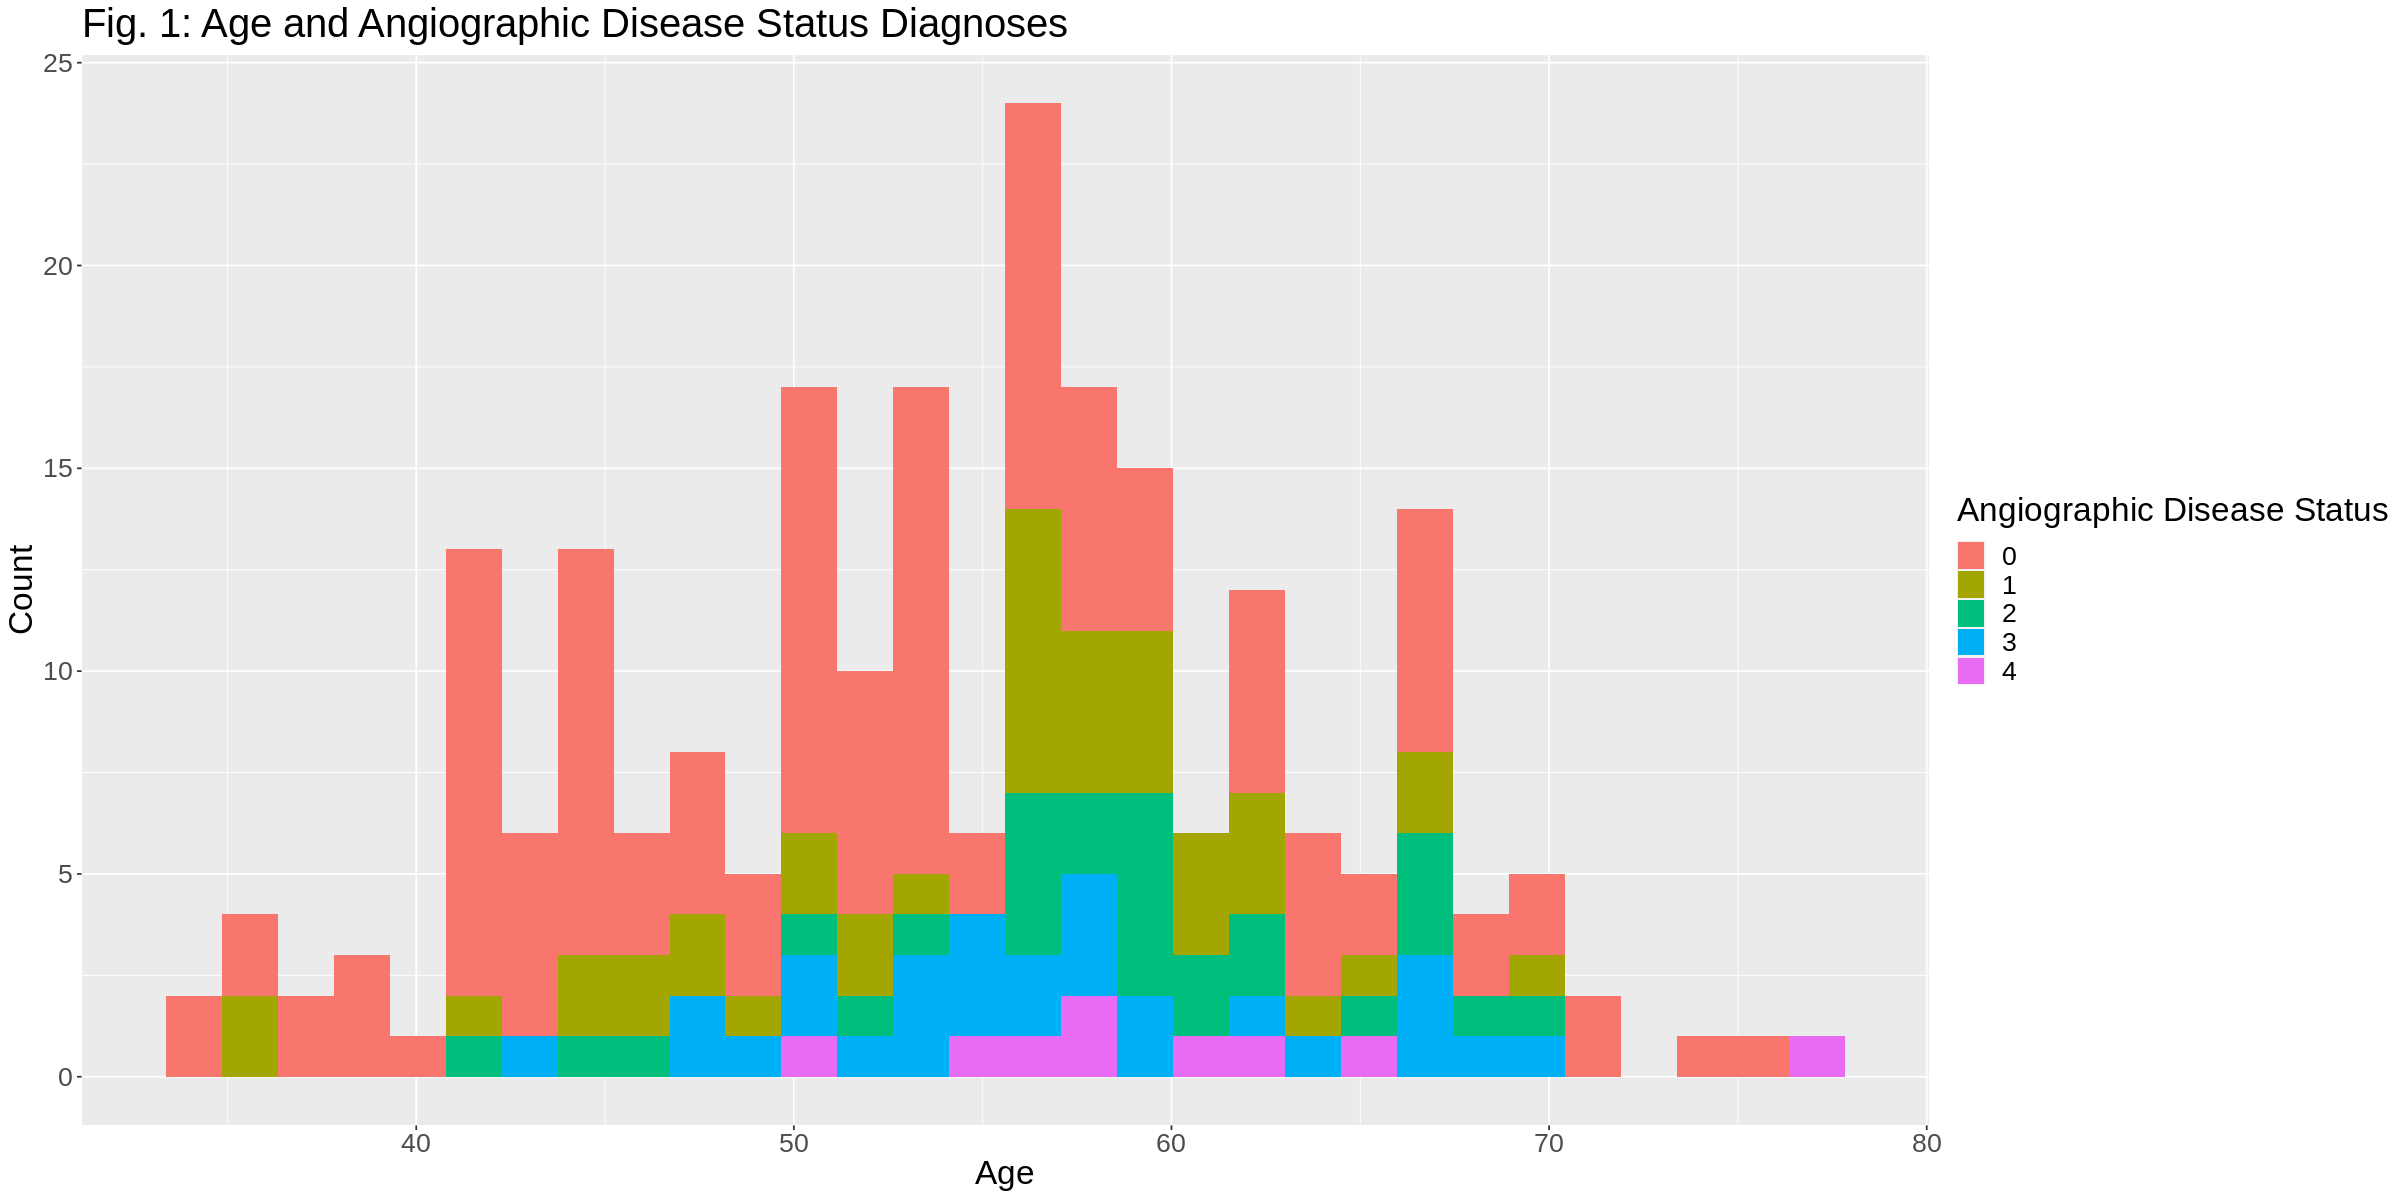

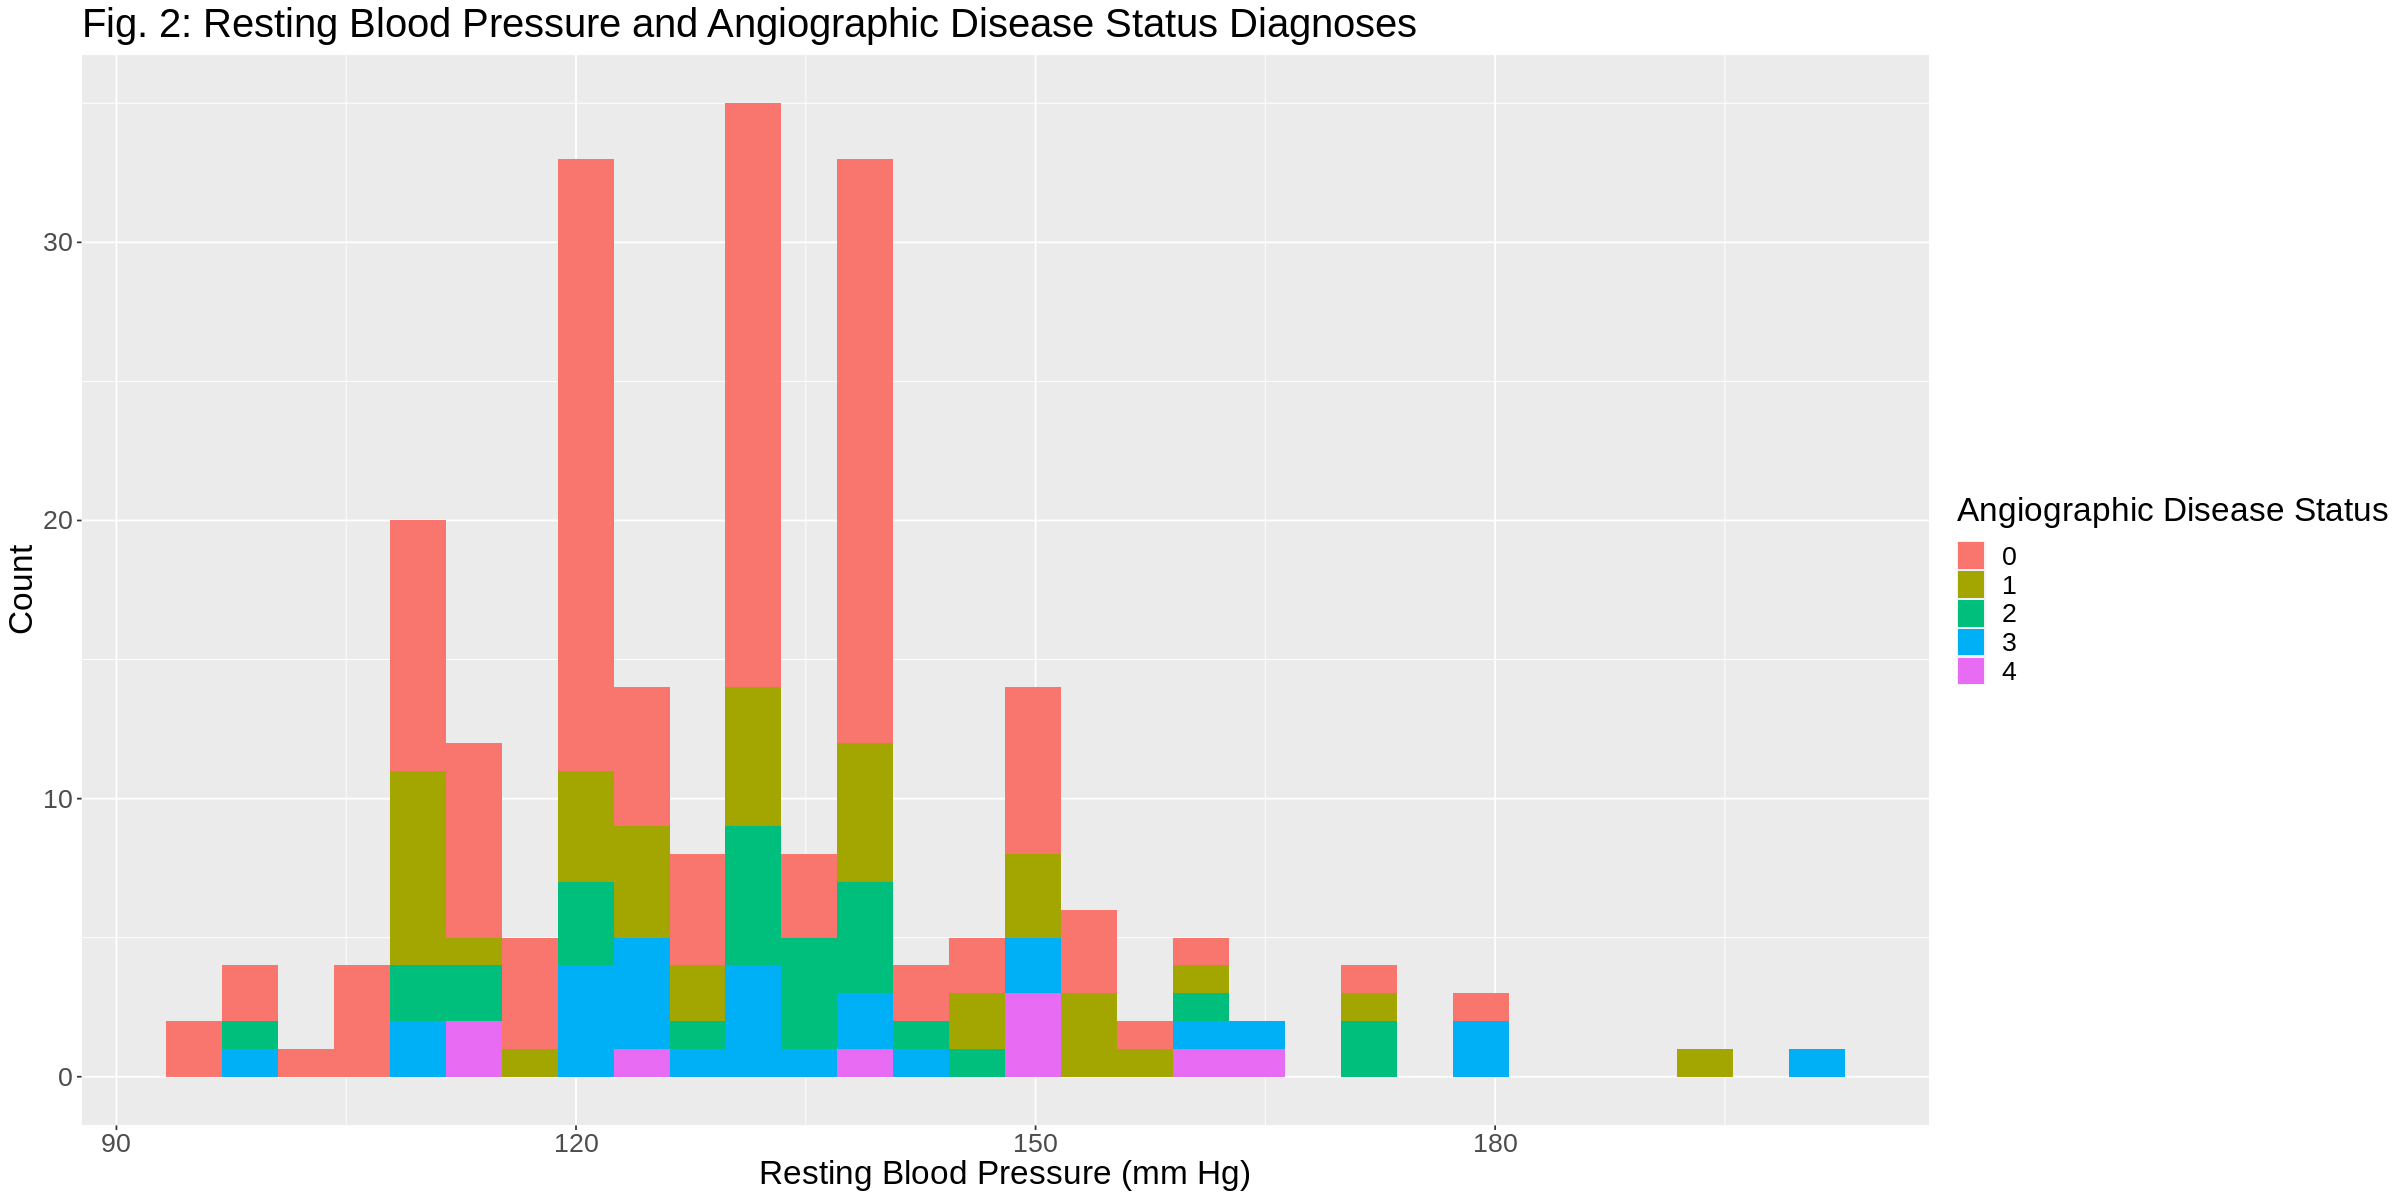

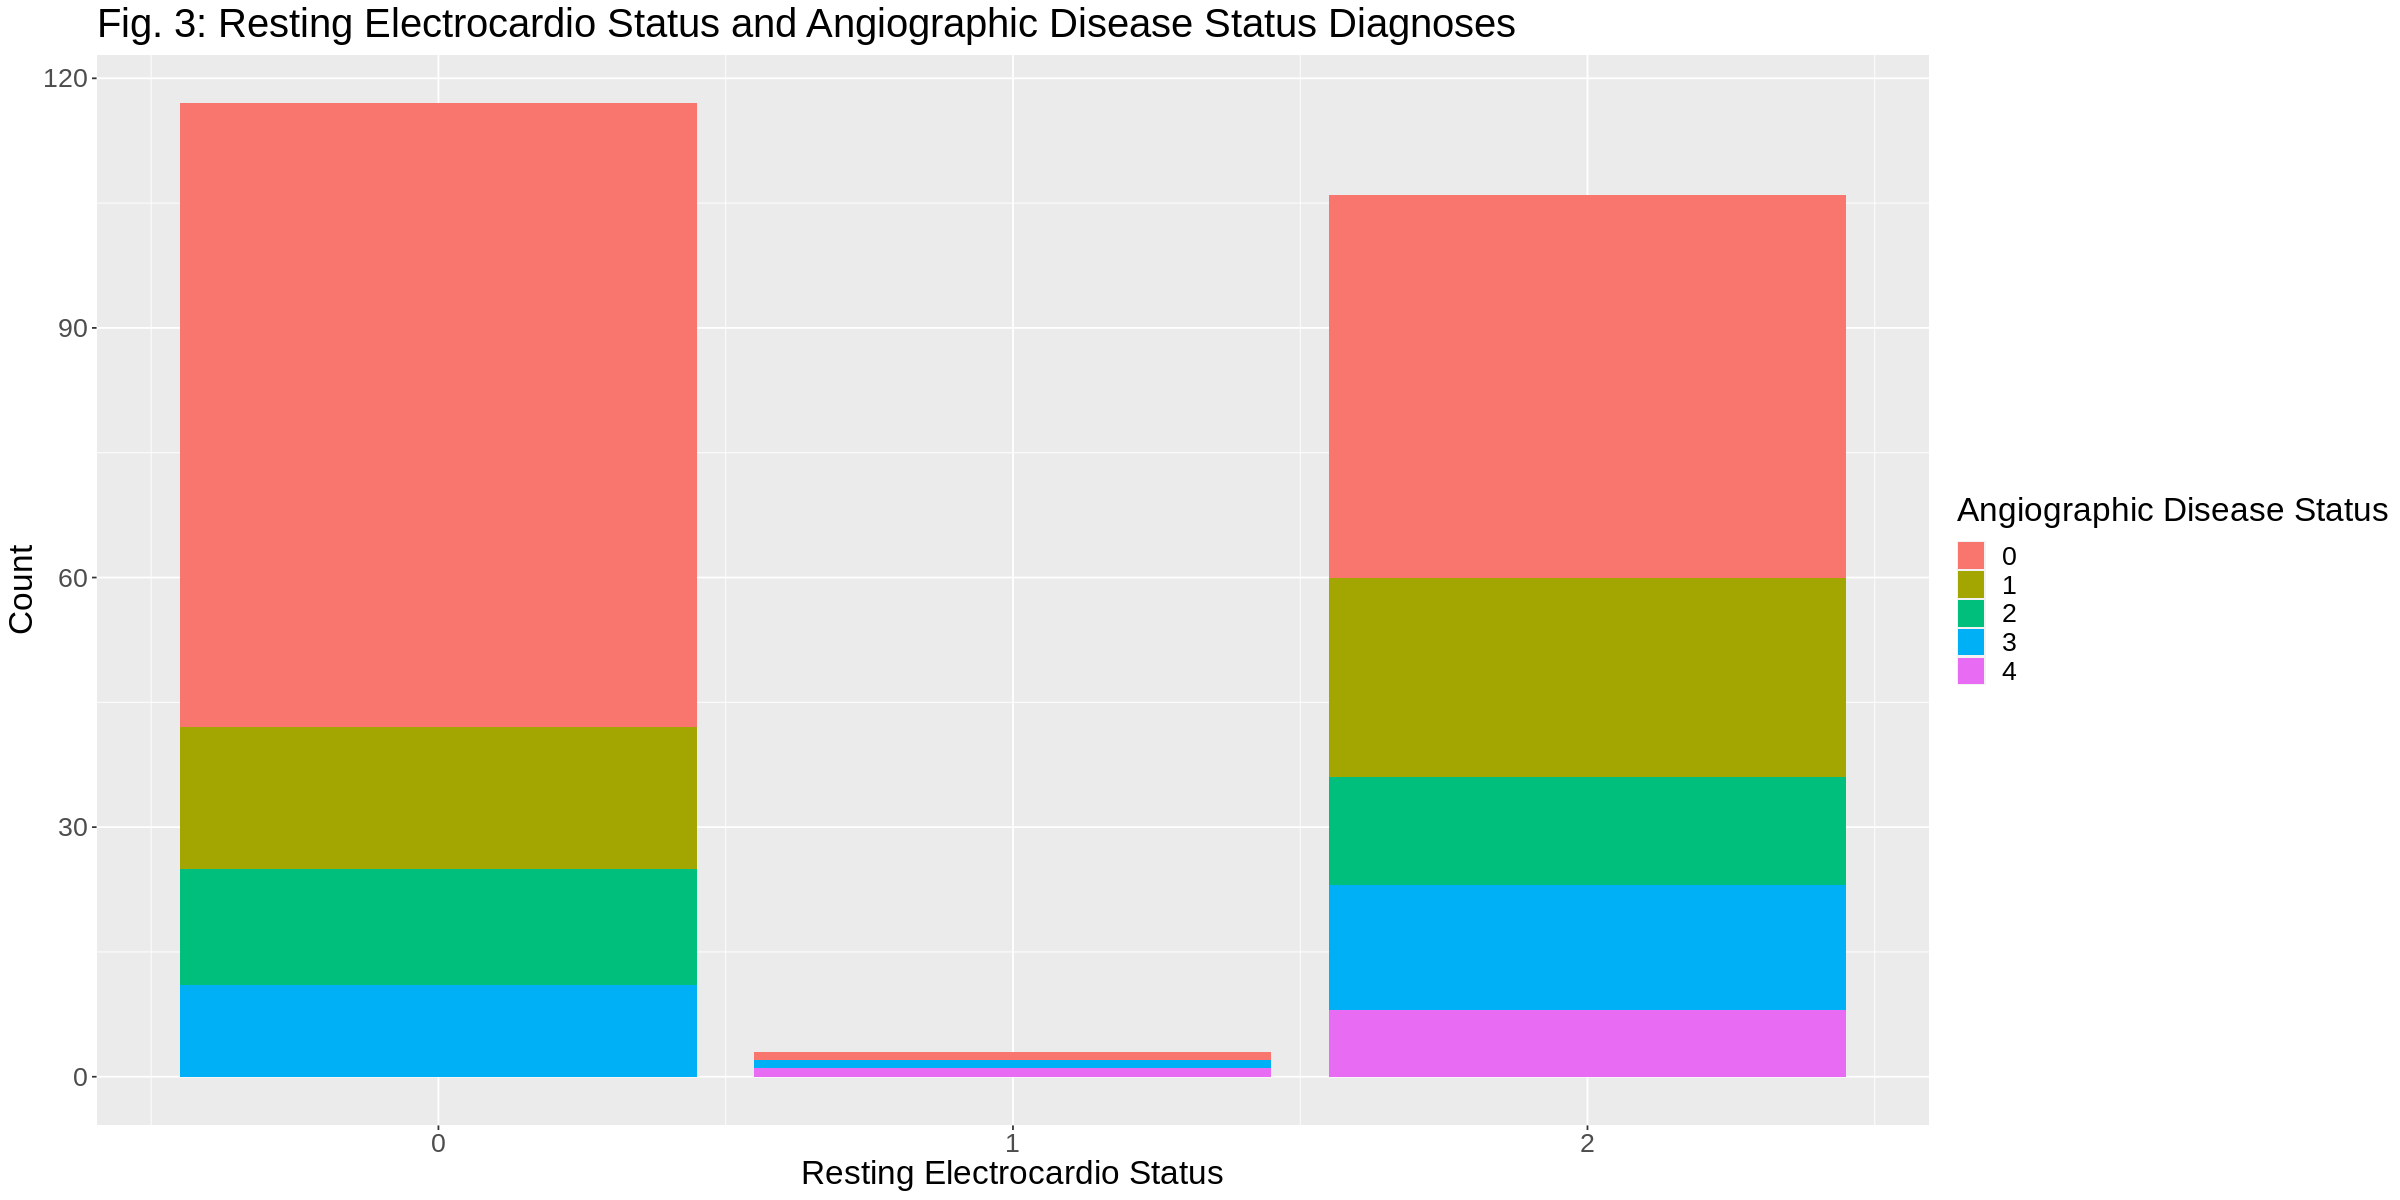

In [11]:
options(repr.plot.width = 20, repr.plot.height = 10) 

resting_age_plot <- ggplot(resting_train, aes(x = age)) +
    ggtitle("Fig. 1: Age and Angiographic Disease Status Diagnoses") +
    geom_histogram(aes(fill = result)) +
    xlab("Age") +
    ylab("Count") +
    labs(fill = "Angiographic Disease Status") +
    theme(text = element_text(size = 20))
resting_age_plot

resting_bps_plot <- ggplot(resting_train, aes(x = resting_blood_pressure)) +
    ggtitle("Fig. 2: Resting Blood Pressure and Angiographic Disease Status Diagnoses") +
    geom_histogram(aes(fill = result)) +
    xlab("Resting Blood Pressure (mm Hg)") +
    ylab("Count") +
    labs(fill = "Angiographic Disease Status") +
    theme(text = element_text(size = 20))
resting_bps_plot

resting_electro_plot <- ggplot(resting_train, aes(x = resting_electrocardio)) +
    ggtitle("Fig. 3: Resting Electrocardio Status and Angiographic Disease Status Diagnoses") +
    geom_bar(aes(fill = result)) +
    xlab("Resting Electrocardio Status") +
    ylab("Count") +
    labs(fill = "Angiographic Disease Status") +
    theme(text = element_text(size = 20))
resting_electro_plot

GROUP 2 GRAPHS

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



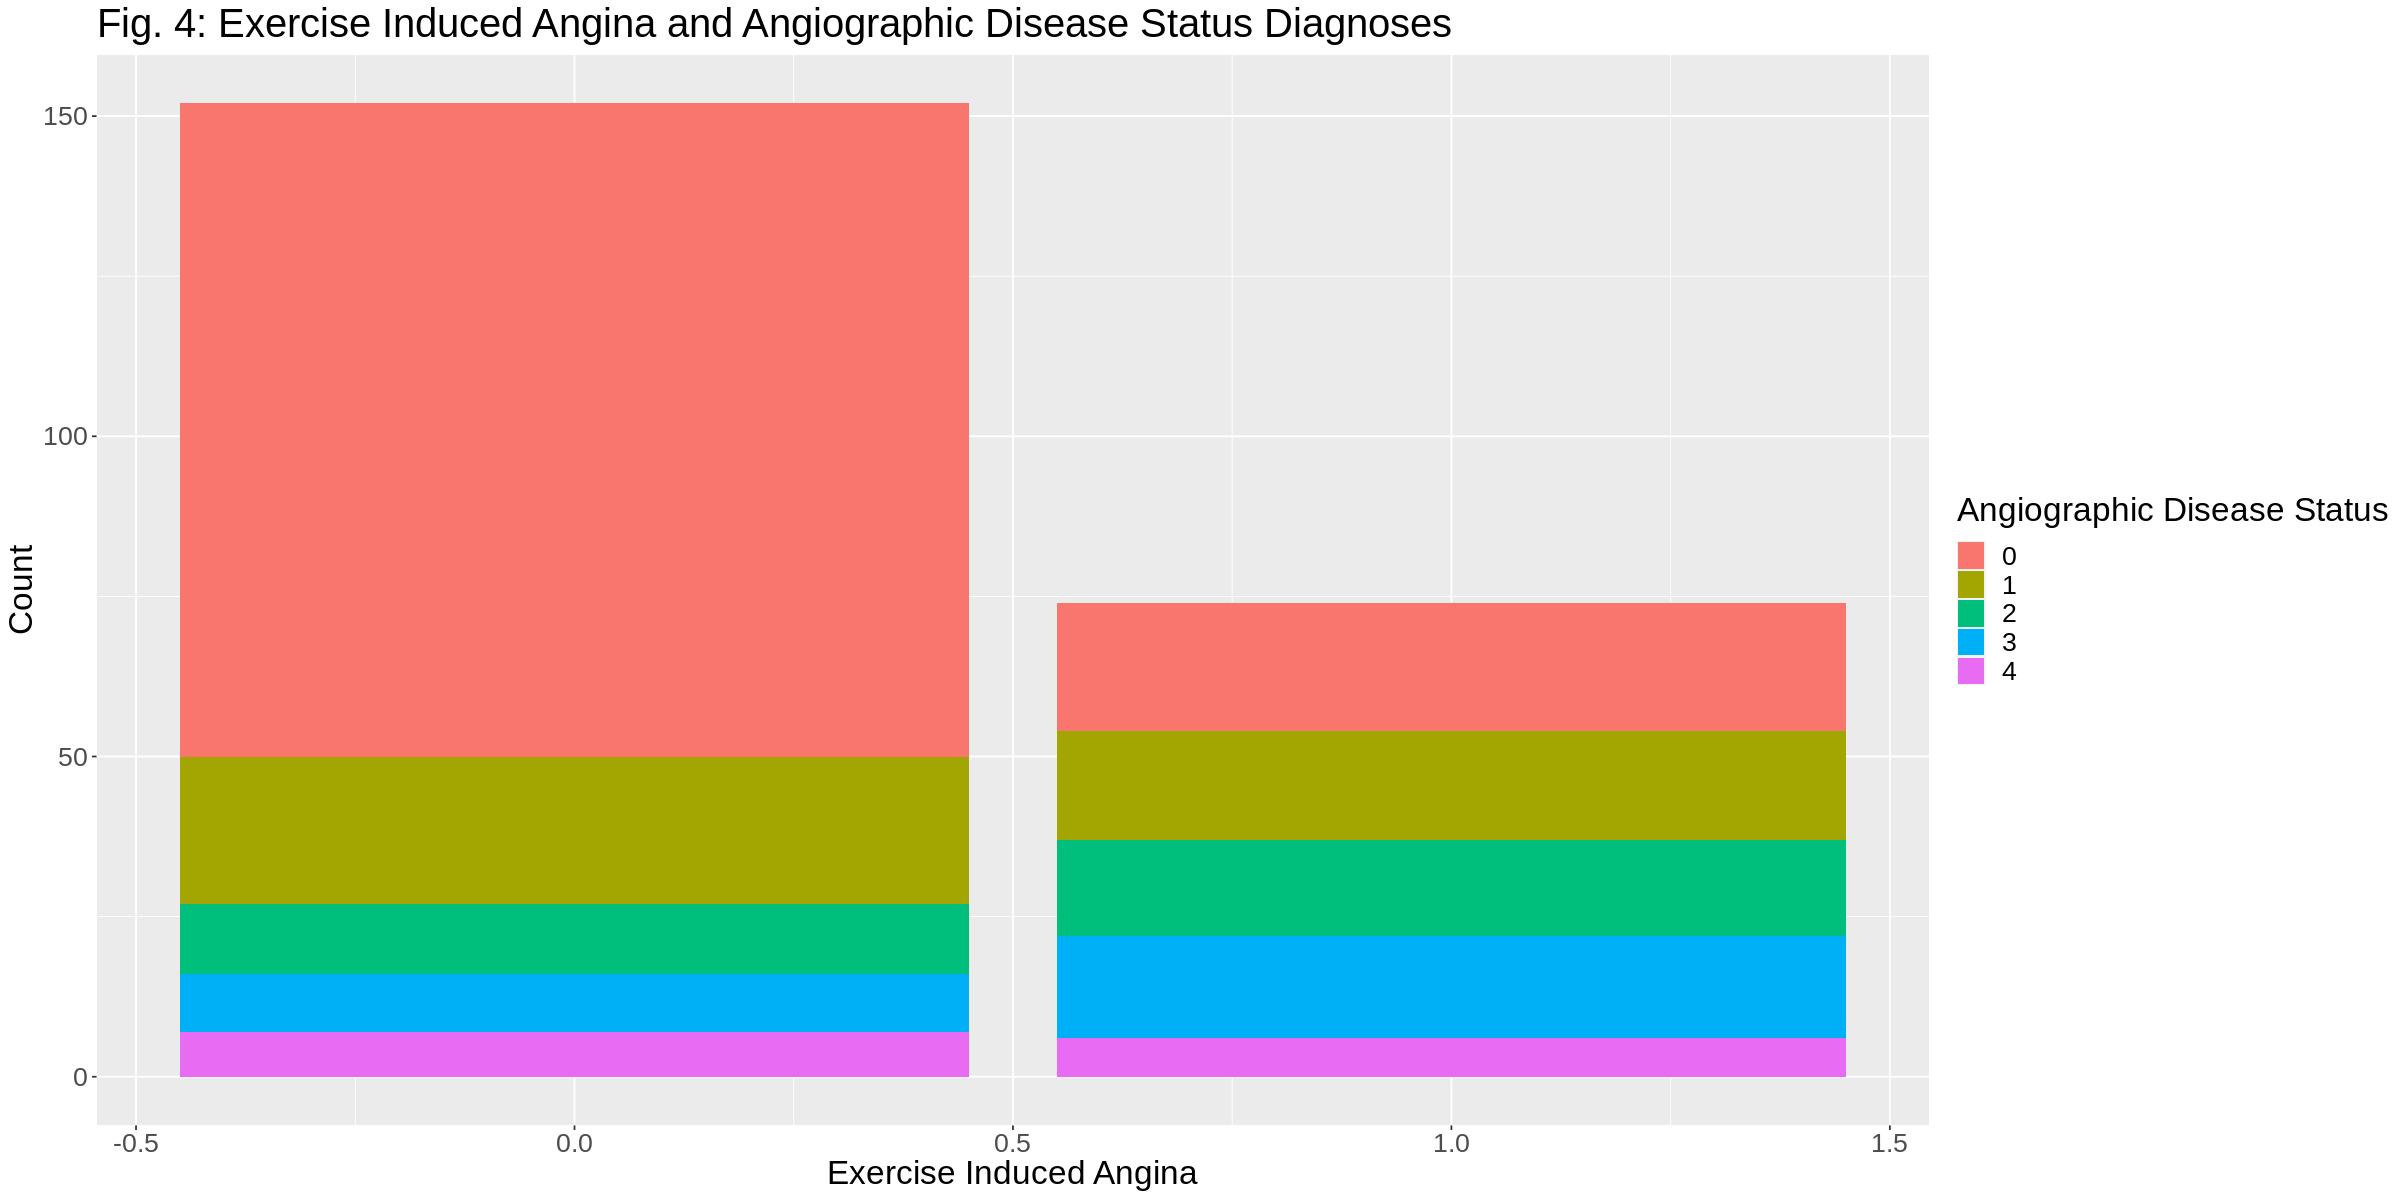

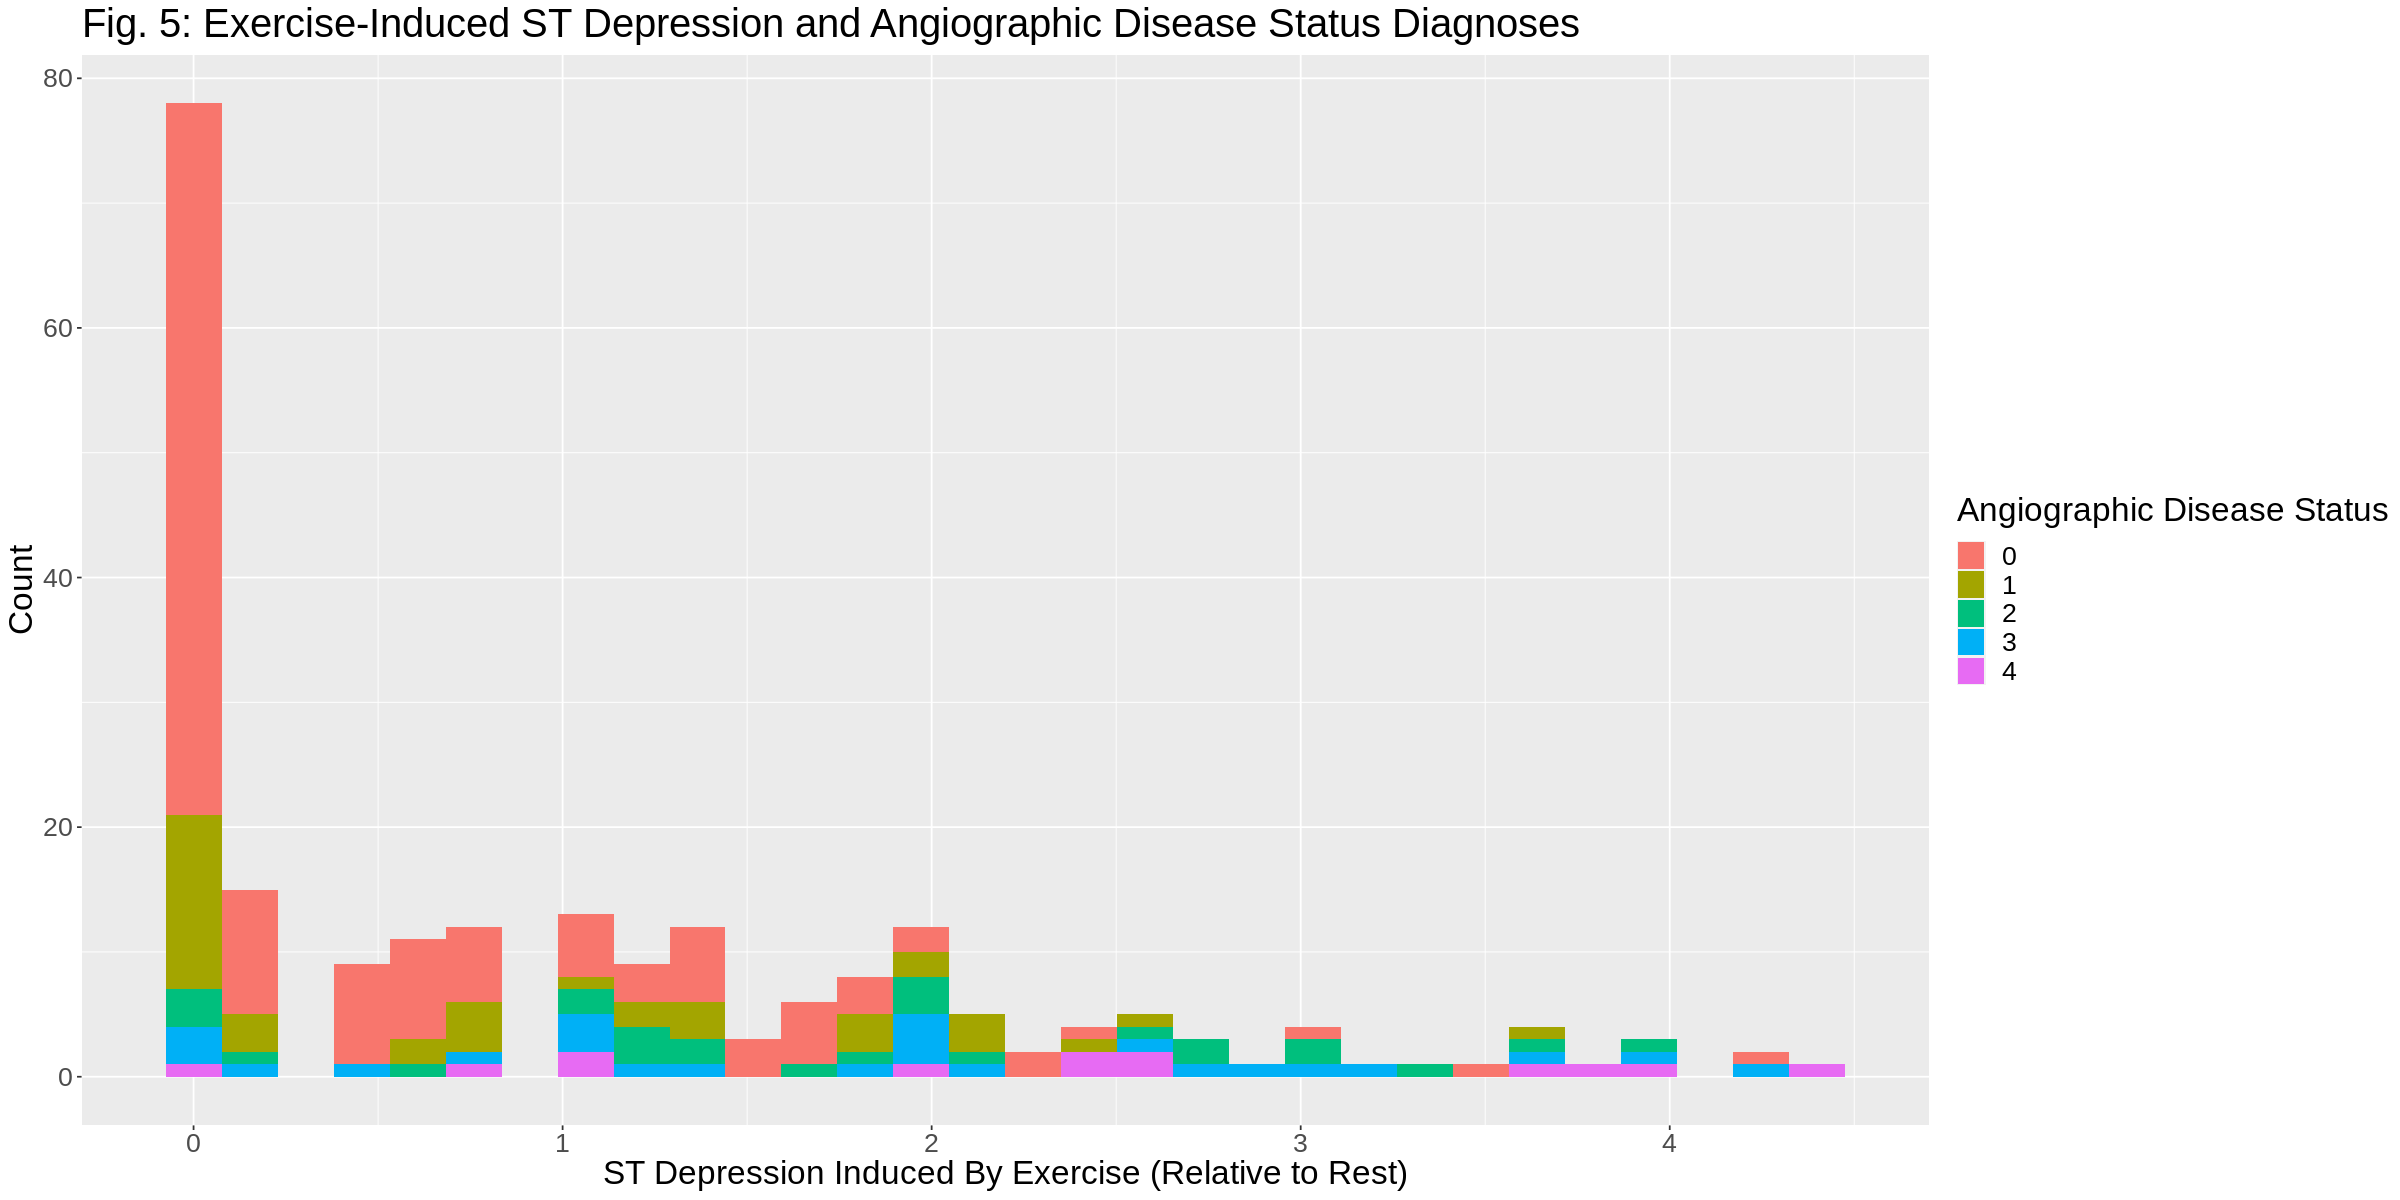

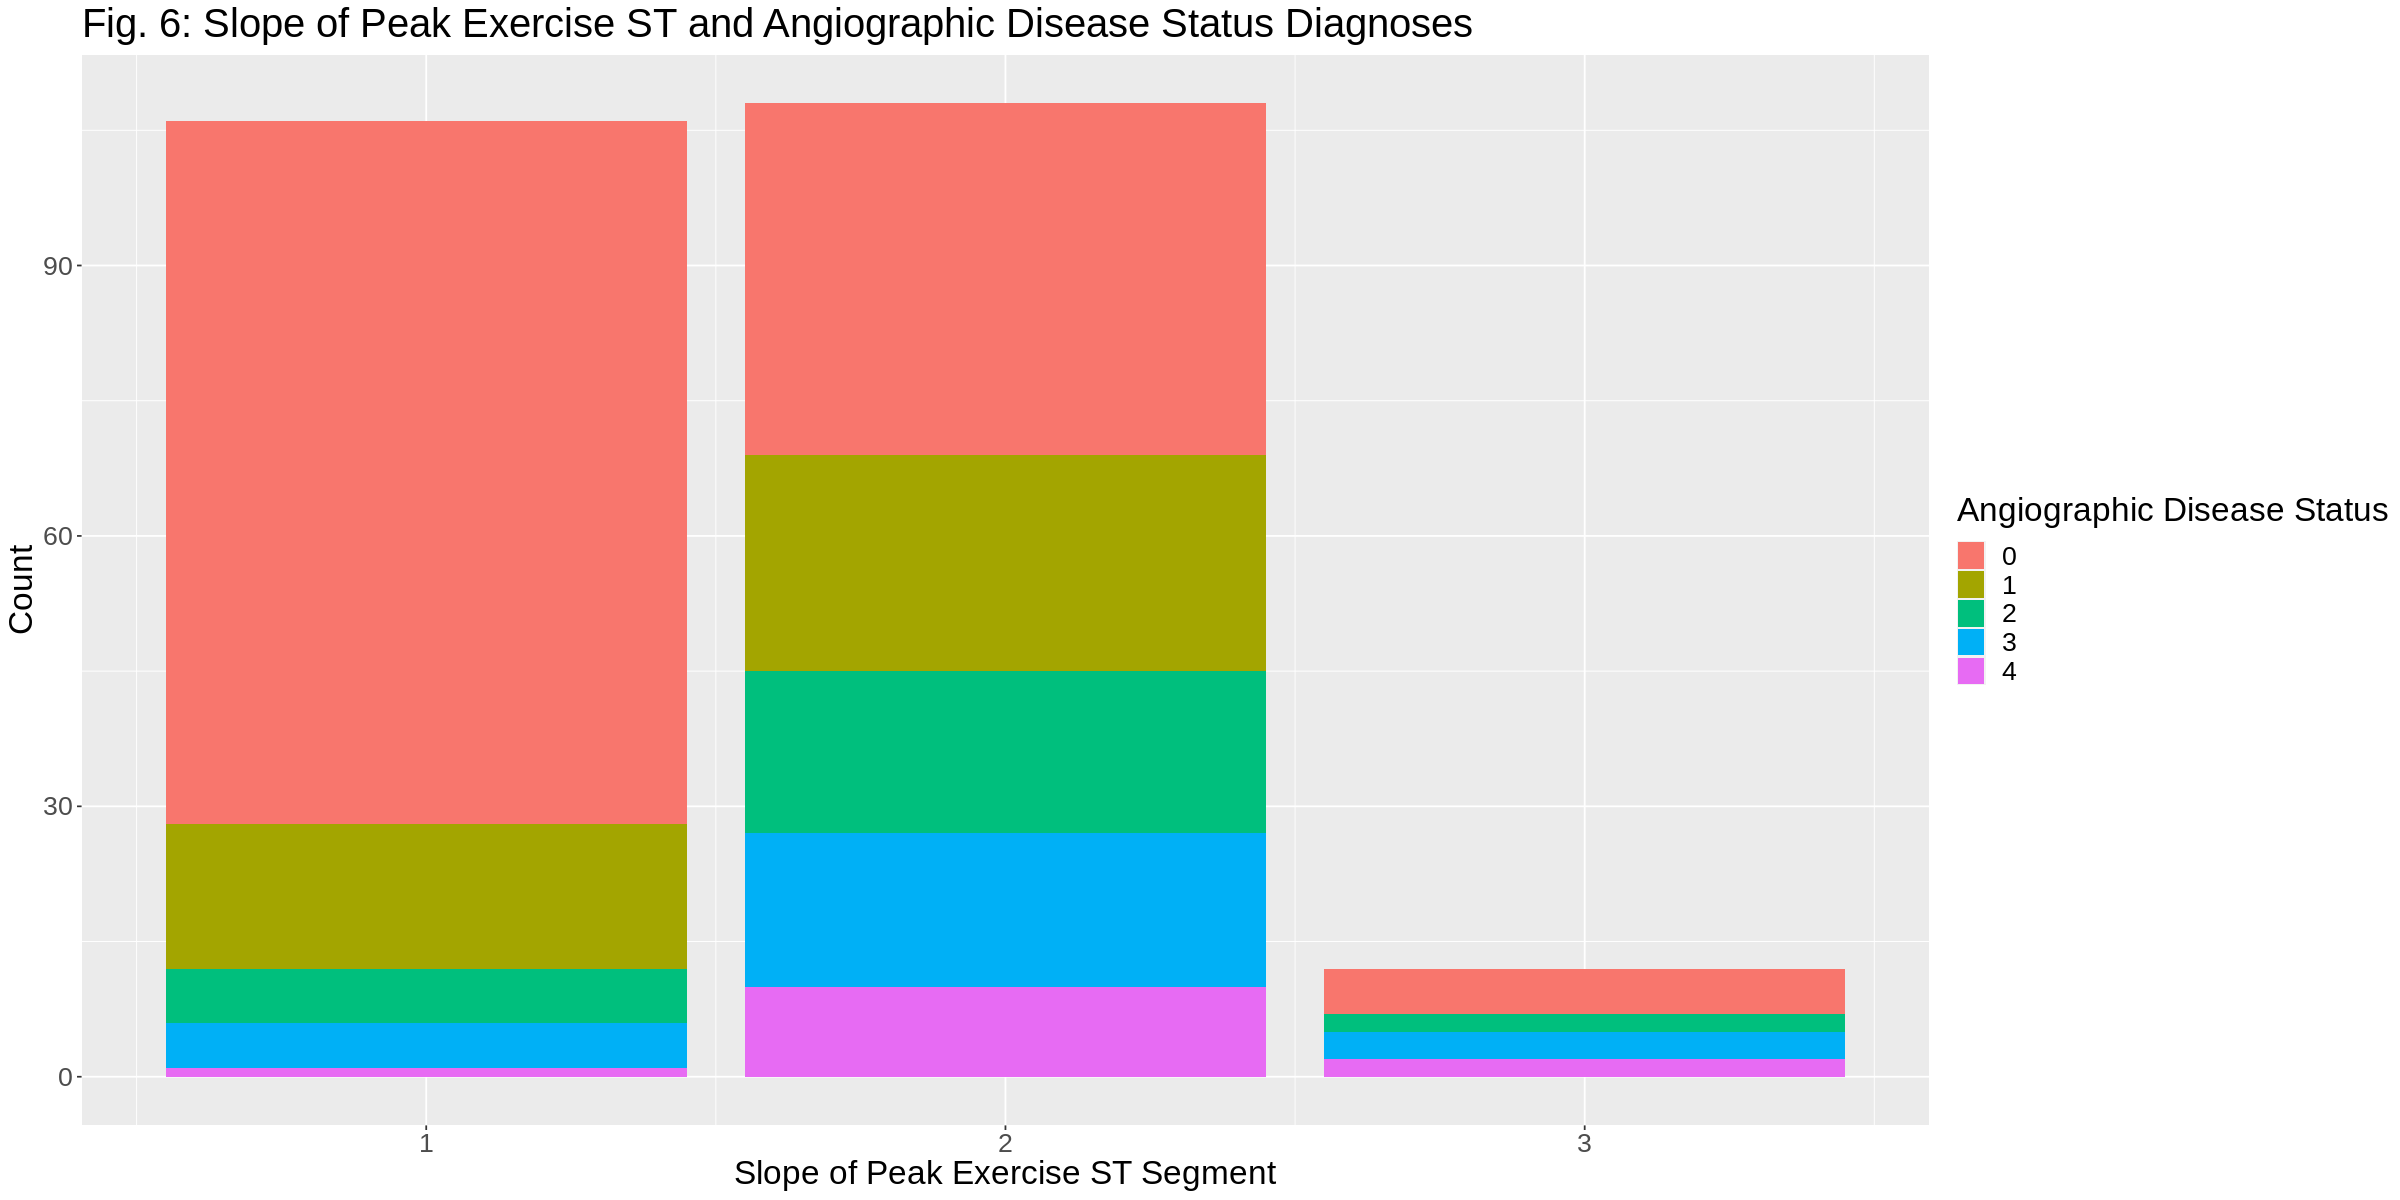

In [12]:
exercise_angina <- ggplot(exercise_train, aes(x = exercise_angina)) +
    ggtitle("Fig. 4: Exercise Induced Angina and Angiographic Disease Status Diagnoses") +
    geom_bar(aes(fill = result)) +
    xlab("Exercise Induced Angina") +
    ylab("Count") +
    labs(fill = "Angiographic Disease Status") +
    theme(text = element_text(size = 20))
exercise_angina

exercise_st_plot <- ggplot(exercise_train, aes(x = exercise_st)) +

    ggtitle("Fig. 5: Exercise-Induced ST Depression and Angiographic Disease Status Diagnoses") +
    geom_histogram(aes(fill = result)) +
    xlab("ST Depression Induced By Exercise (Relative to Rest)") +
    ylab("Count") +
    labs(fill = "Angiographic Disease Status") +
    theme(text = element_text(size = 20))
exercise_st_plot

exercise_slope_plot <- ggplot(exercise_train, aes(x = exercise_slope)) +
    ggtitle("Fig. 6: Slope of Peak Exercise ST and Angiographic Disease Status Diagnoses") +
    geom_bar(aes(fill = result)) +
    xlab("Slope of Peak Exercise ST Segment") +
    ylab("Count") +
    labs(fill = "Angiographic Disease Status") +
    theme(text = element_text(size = 20))
exercise_slope_plot

In [ ]:
#Source:

#Aha, D.W. (n.d.). Heart Disease Data Set. UCI Machine Learning Repository. 
#https://archive.ics.uci.edu/ml/datasets/Heart+Disease 
